# RocketPy Simulation
This notebook was generated using Rocket-Serializer, a RocketPy tool to convert simulation files to RocketPy simulations
The notebook was generated using the following parameters file: examples/EPFL--BellaLui--2020/parameters.json


In [55]:
%pip install rocketpy<=2.0

Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [56]:
from rocketpy import (
    Environment,
    SolidMotor,
    Rocket,
    Flight,
    TrapezoidalFins,
    RailButtons,
    NoseCone,
    Tail,
)
import datetime

## Environment


In [57]:
env = Environment()
env.set_location(latitude=28.61, longitude=-80.6)
env.set_elevation(0.0)

Optionally, you can set the date and atmospheric model


In [58]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
env.set_atmospheric_model(type="Forecast", file="GFS")


Gravity Details

Acceleration of Gravity at Lauch Site: 9.78031867951818 m/s²


Launch Site Details

Launch Date: 2023-11-02 12:00:00 UTC
Launch Site Latitude: 28.61000°
Launch Site Longitude: -80.60000°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 166021.44 W|E    0.00 N
Launch Site UTM zone: 31N
Launch Site Surface Elevation: 2.2 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 78.927 km
Forecast Time Period: From  2023-11-01 06:00:00  to  2023-11-17 06:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 11.90 m/s
Surface Wind Direction: 54.21°
Surface Wind Heading: 234.21°
Surface Pressure: 1000.00 hPa
Surface Temperature: 291.56 K
Surface Air Density: 1.195 kg/m³
Surface Speed of Sound: 342.30 m/s



Gravity Model Plots


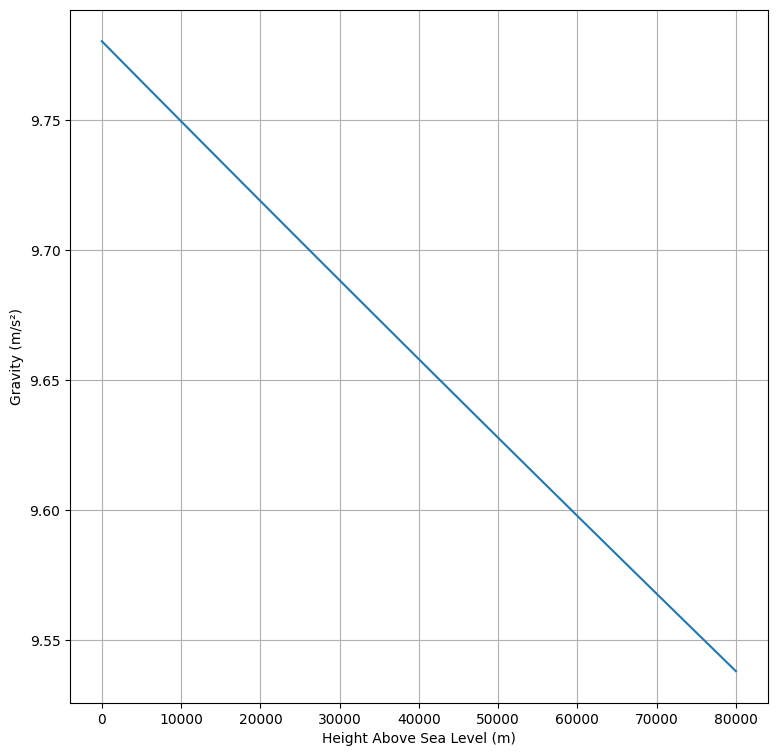



Atmospheric Model Plots


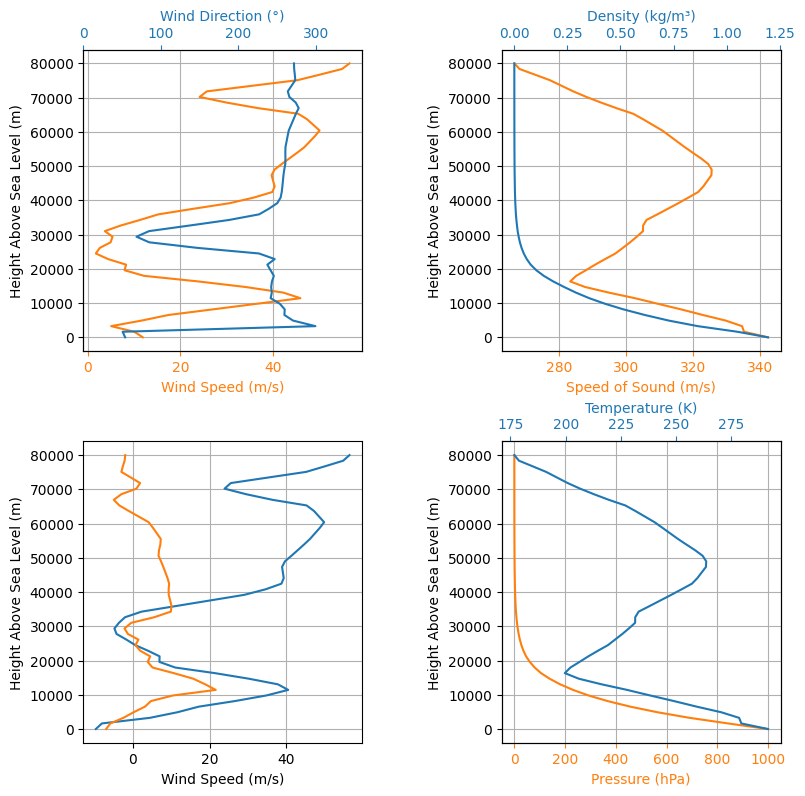

In [59]:
env.all_info()

## Motor
Currently, only Solid Motors are supported by Rocket-Serializer
If you want to use a Liquid or Hybrid motor, please use rocketpy directly.


In [60]:
motor = SolidMotor(
    thrust_source="C:/Users/guiga/Documents/Github-vscode/RocketSerializer/examples/EPFL--BellaLui--2020/thrust_source.csv",
    dry_mass=0.0,
    center_of_dry_mass_position=0.2895,
    dry_inertia=[0, 0, 0],
    grains_center_of_mass_position=0.2895,
    grain_number=1,
    grain_density=1378.7438125434685,
    grain_outer_radius=0.027,
    grain_initial_inner_radius=0.0135,
    grain_initial_height=0.579,
    grain_separation=0,
    nozzle_radius=0.02025,
    burn_time=2.5779,
    nozzle_position=0,
    throat_radius=0.0135,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method="linear",
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

Nozzle Details
Nozzle Radius: 0.02025 m
Nozzle Throat Radius: 0.0135 m

Grain Details
Number of Grains: 1
Grain Spacing: 0 m
Grain Density: 1378.7438125434685 kg/m3
Grain Outer Radius: 0.027 m
Grain Inner Radius: 0.0135 m
Grain Height: 0.579 m
Grain Volume: 0.001 m3
Grain Mass: 1.371 kg

Motor Details
Total Burning Time: 2.5779 s
Total Propellant Mass: 1.371 kg
Average Propellant Exhaust Velocity: 1556.001 m/s
Average Thrust: 827.646 N
Maximum Thrust: 1287.5 N at 0.05 s after ignition.
Total Impulse: 2133.588 Ns



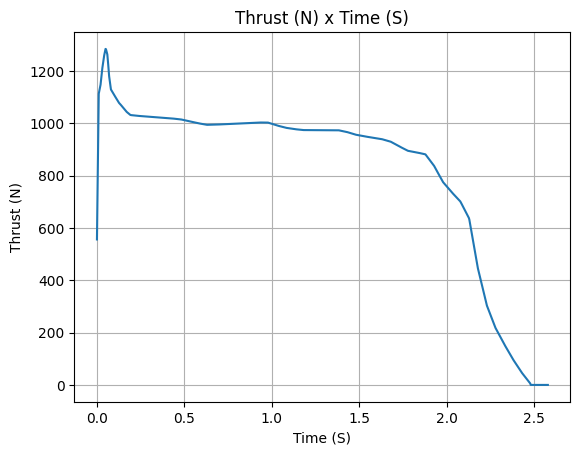

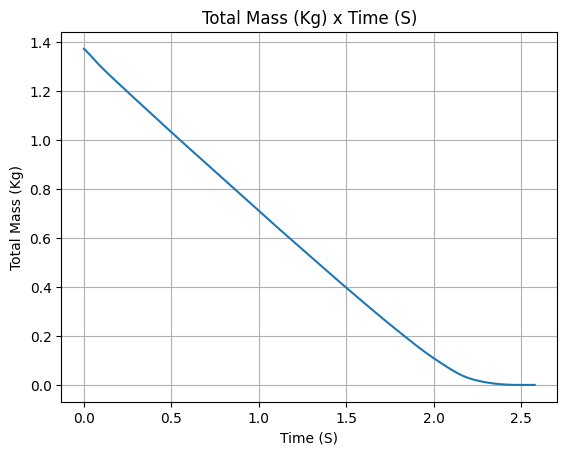

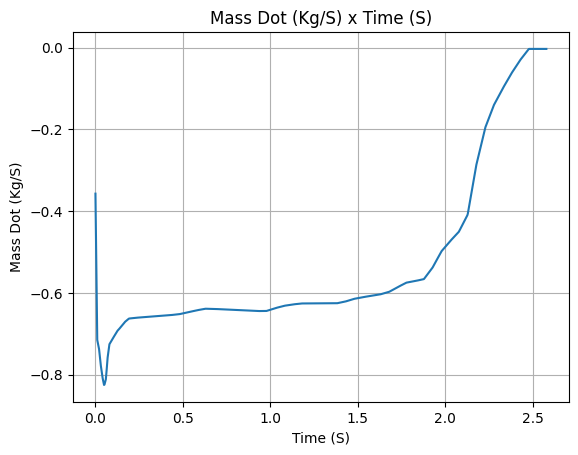

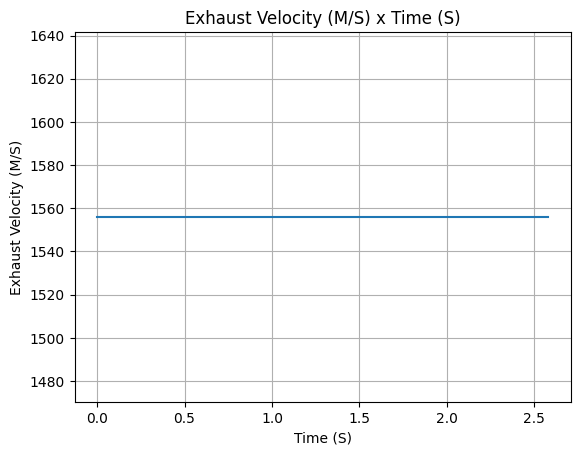

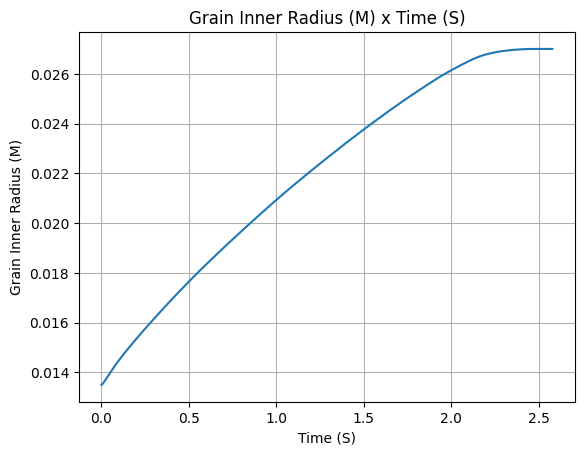

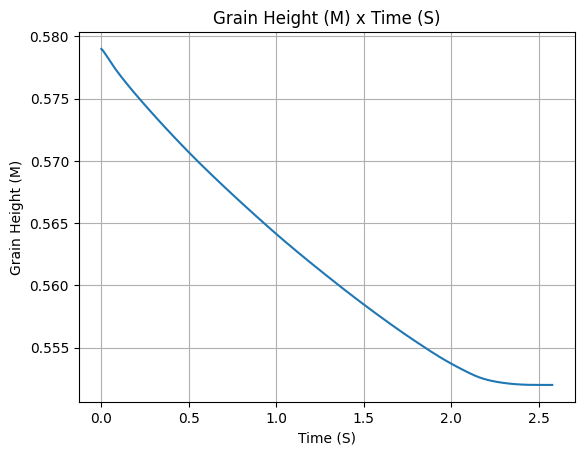

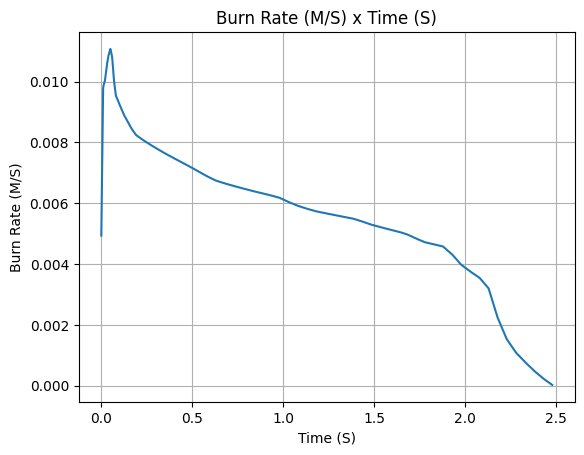

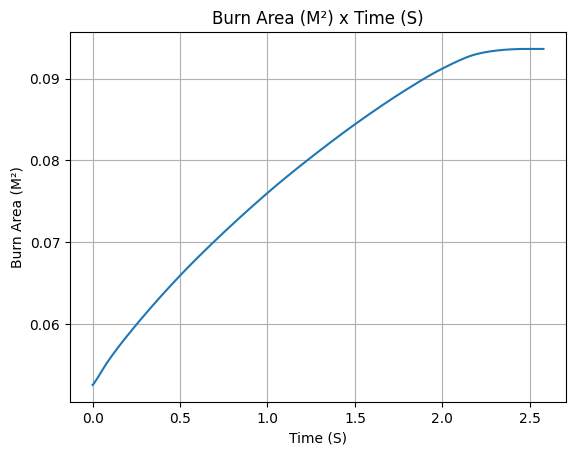

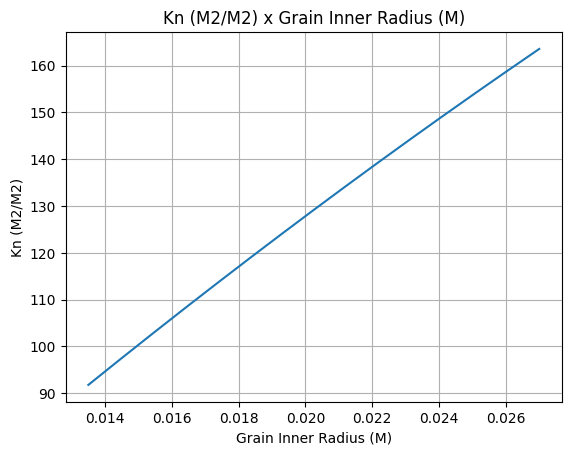

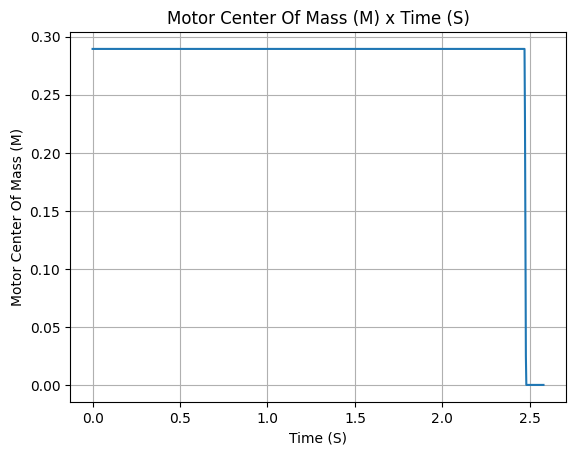

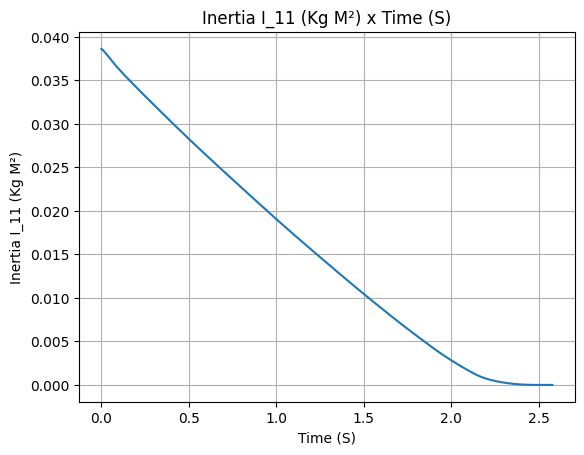

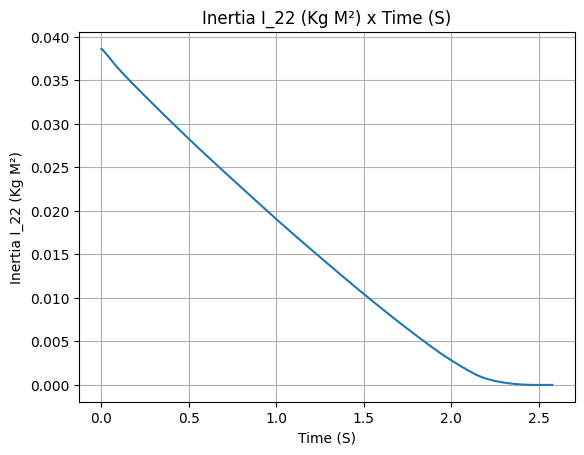

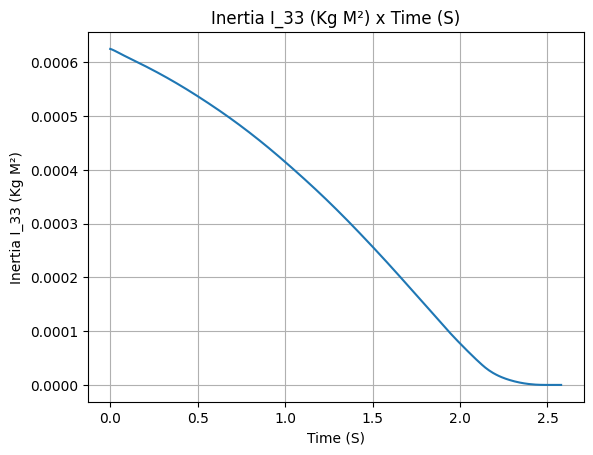

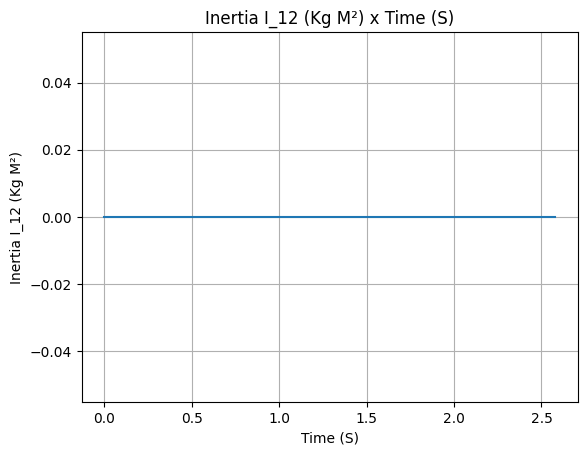

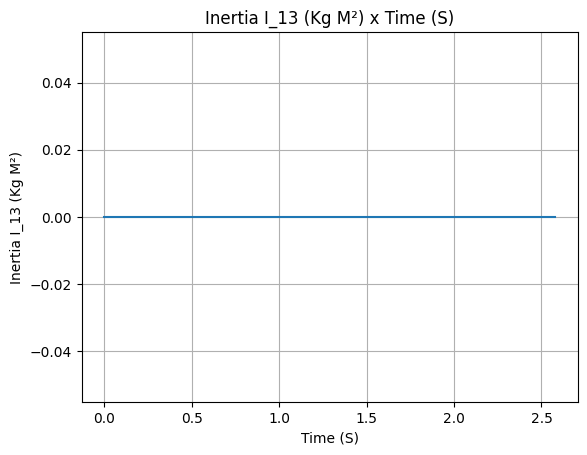

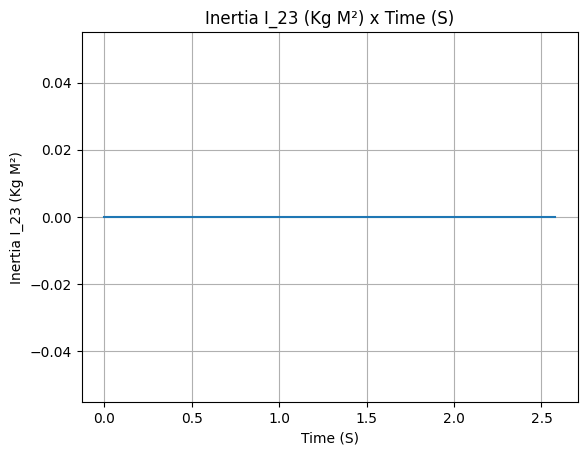

In [61]:
motor.all_info()

## Rocket
Currently, only single stage rockets are supported by Rocket-Serializer
We will start by defining the aerodynamic surfaces, and then build the rocket.


### Nosecones


In [62]:
nosecone = NoseCone(
    length=0.242,
    kind="ogive",
    base_radius=0.078,
    rocket_radius=0.078,
    name="0.242",
)

### Fins
As rocketpy allows for multiple fins sets, we will create a dictionary with all the fins sets and then add them to the rocket


In [63]:
trapezoidal_fins = {}

In [64]:
trapezoidal_fins[0] = TrapezoidalFins(
    n=3,
    root_chord=0.28,
    tip_chord=0.125,
    span=0.2,
    cant_angle=0.0,
    sweep_length=0.09326153163099972,
    sweep_angle=None,
    rocket_radius=0.078,
    name="Conjunto de aletas trapezoidais",
)

### Transitions (Tails)
As rocketpy allows for multiple tails, we will create a dictionary with all the tails and then add them to the rocket


In [65]:
tails = {}

In [66]:
tails[0] = Tail(
    top_radius=0.078,
    bottom_radius=0.0675,
    length=0.05,
    rocket_radius=0.078,
    name="Cauda",
)

In [67]:
rocket = Rocket(
    radius=0.078,
    mass=8.419,
    inertia=[0.096246, 0.096246, 5.8581],
    power_off_drag="C:/Users/guiga/Documents/Github-vscode/RocketSerializer/examples/EPFL--BellaLui--2020/drag_curve.csv",
    power_on_drag="C:/Users/guiga/Documents/Github-vscode/RocketSerializer/examples/EPFL--BellaLui--2020/drag_curve.csv",
    center_of_mass_without_motor=1.559,
    coordinate_system_orientation="tail_to_nose",
)

### Adding surfaces to the rocket
Now that we have all the surfaces, we can add them to the rocket


In [68]:
rocket.add_motor(motor, position=0.078)


Inertia Details

Rocket Mass: 8.419 kg
Rocket Dry Mass: 8.419 kg (With Motor)
Rocket Mass: 9.790 kg (With Propellant)
Rocket Inertia (with motor, but without propellant) 11: 0.096 kg*m2
Rocket Inertia (with motor, but without propellant) 22: 0.096 kg*m2
Rocket Inertia (with motor, but without propellant) 33: 5.858 kg*m2
Rocket Inertia (with motor, but without propellant) 12: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 13: 0.000 kg*m2
Rocket Inertia (with motor, but without propellant) 23: 0.000 kg*m2


Geometrical Parameters

Rocket Maximum Radius: 0.078 m
Rocket Frontal Area: 0.019113 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass withour Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit Distance: 1.481 m
Rocket Center of Dry Mass - Center of Propellant Mass: 1.192 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.167 m


Aerodynamics Lift Coefficient Derivatives


Aerodynamics Center of Pressure

Distance - Center of Pressure to Cent

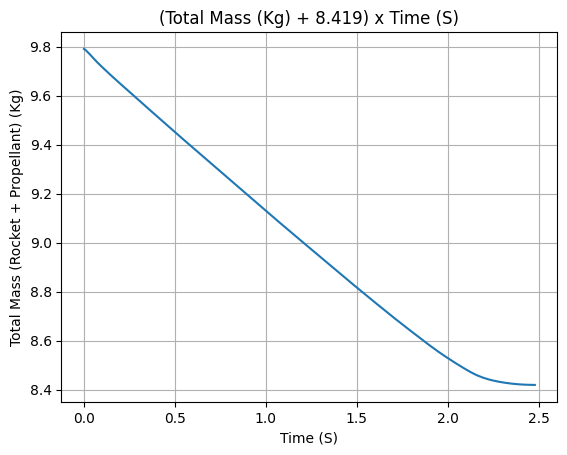

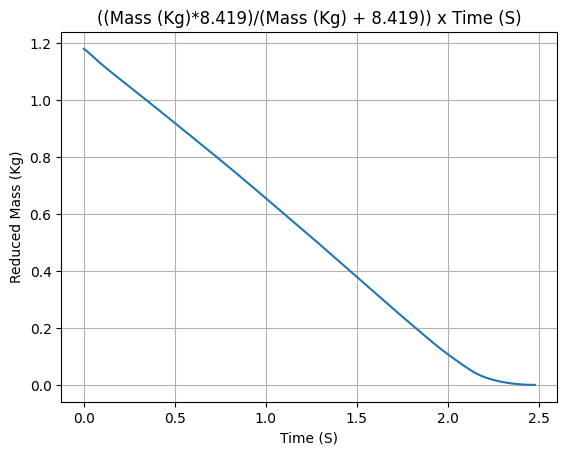


Aerodynamics Plots


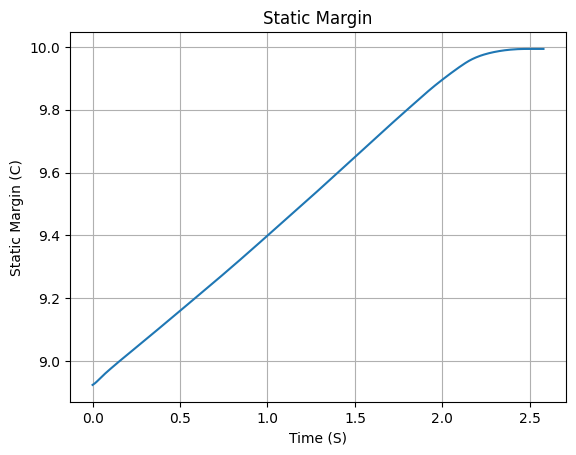

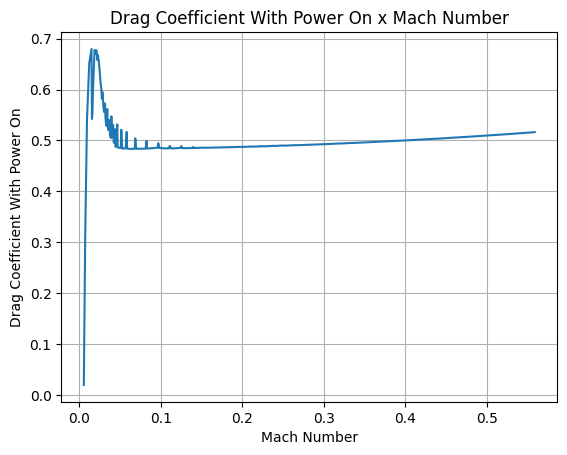

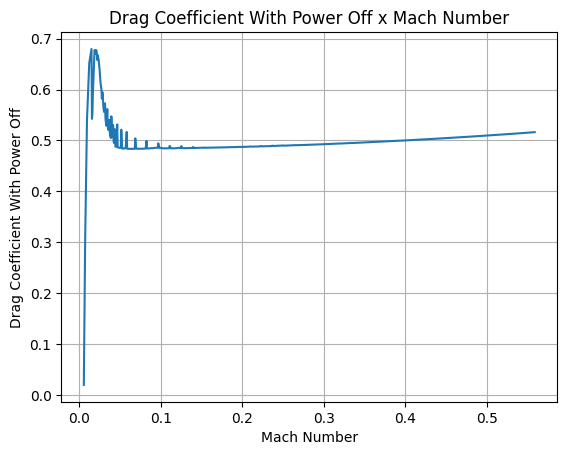

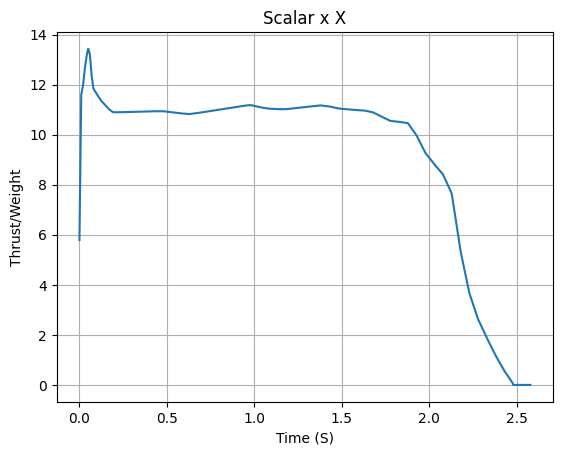

In [69]:
### Rocket Info
rocket.all_info()

## Flight
We will now create the flight simulation. Let's go!


In [70]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=1.0,
    inclination=90.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)


Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 2.16 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.707 | e1: 0.000 | e2: -0.000 | e3: -0.707
Euler Angles - Spin φ : -225.00° | Nutation θ: -0.00° | Precession ψ: 135.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Surface Wind Conditions

Frontal Surface Wind Speed: -9.65 m/s
Lateral Surface Wind Speed: -6.96 m/s


Launch Rail

Launch Rail Length: 1.0  m
Launch Rail Inclination: 90.00°
Launch Rail Heading: 90.00°


Rail Departure State

Rail Departure Time: 0.137 s
Rail Departure Velocity: 14.609 m/s
Rail Departure Static Margin: 8.992 c
Rail Departure Angle of Attack: 39.159°
Rail Departure Thrust-Weight Ratio: 11.260
Rail Departure Reynolds Number: 1.945e+05


Burn out State

Burn out time: 2.578 s
Altitude at burn out: 297.007 m (AGL)
Rocket velocity at burn out: 180.292 m/s
Freestream velocity at burn out: 180.697 m/s
Mach Number at burn out: 0.529
Kinetic energy at burn 

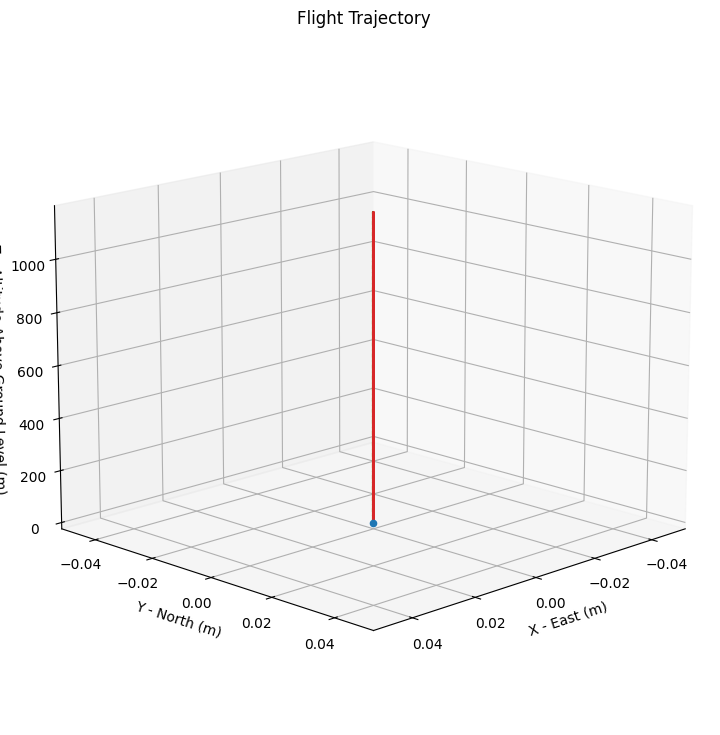



Trajectory Kinematic Plots



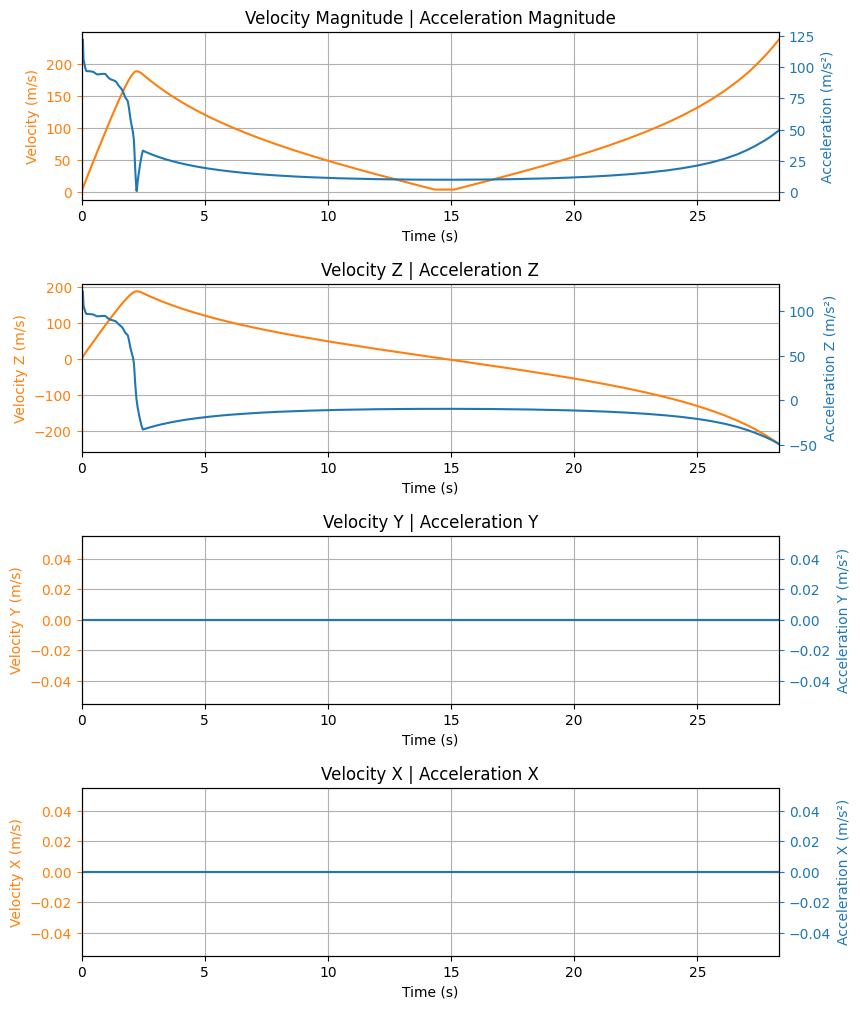



Angular Position Plots



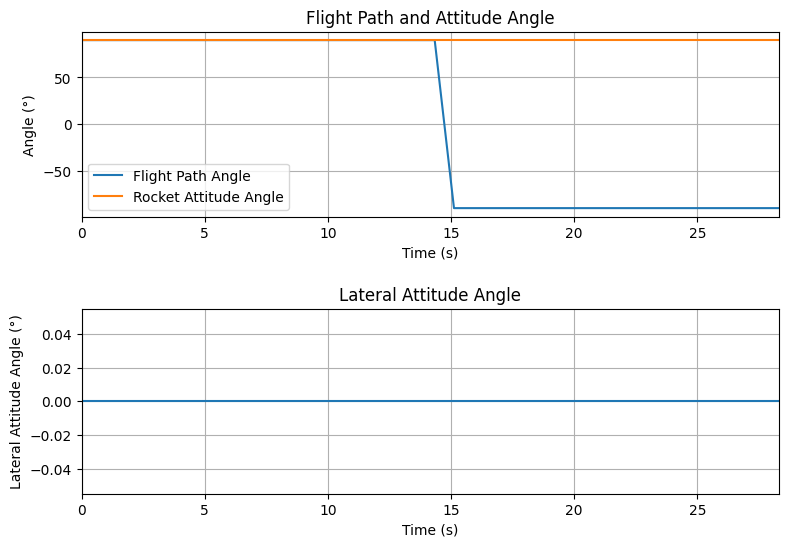



Path, Attitude and Lateral Attitude Angle plots



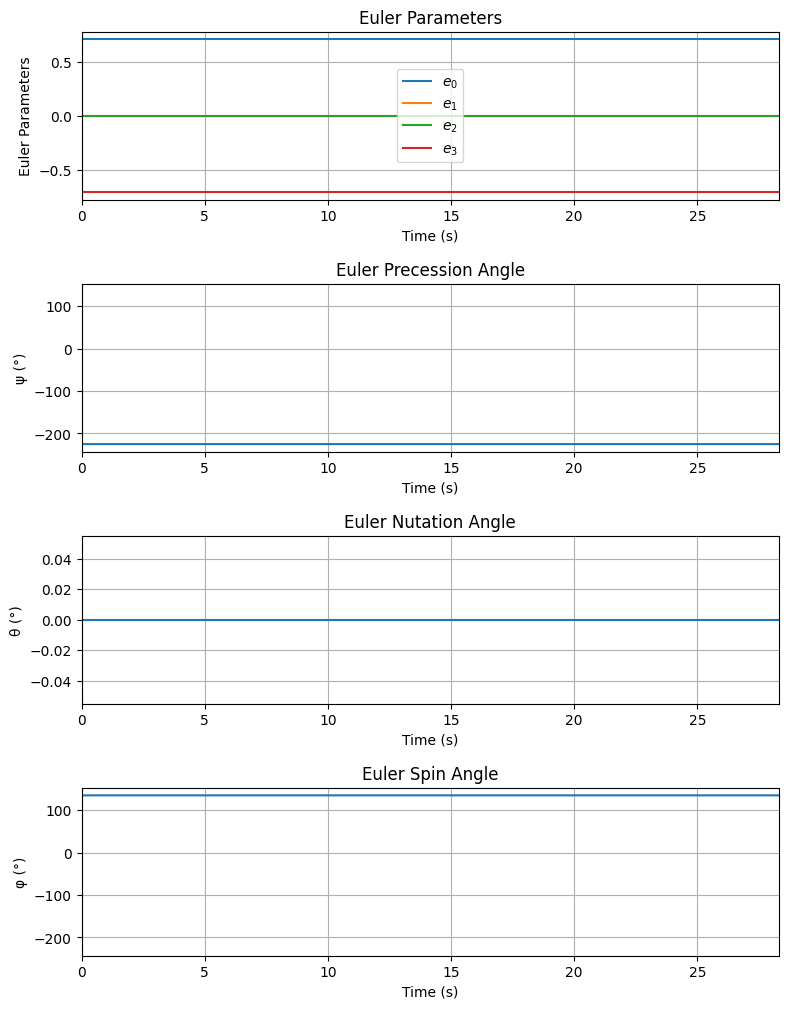



Trajectory Angular Velocity and Acceleration Plots



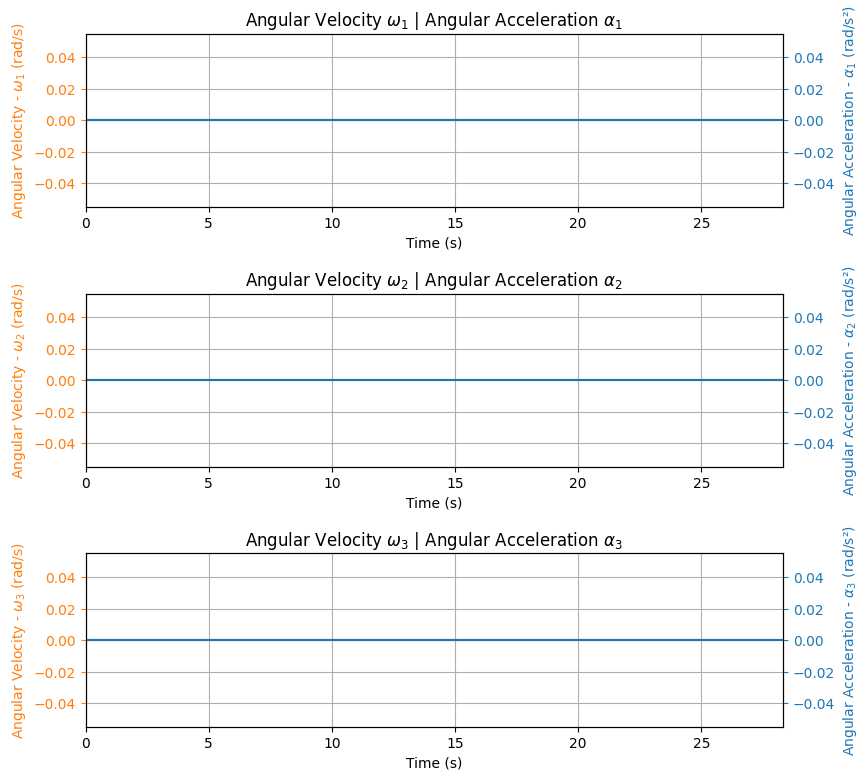



Aerodynamic Forces Plots



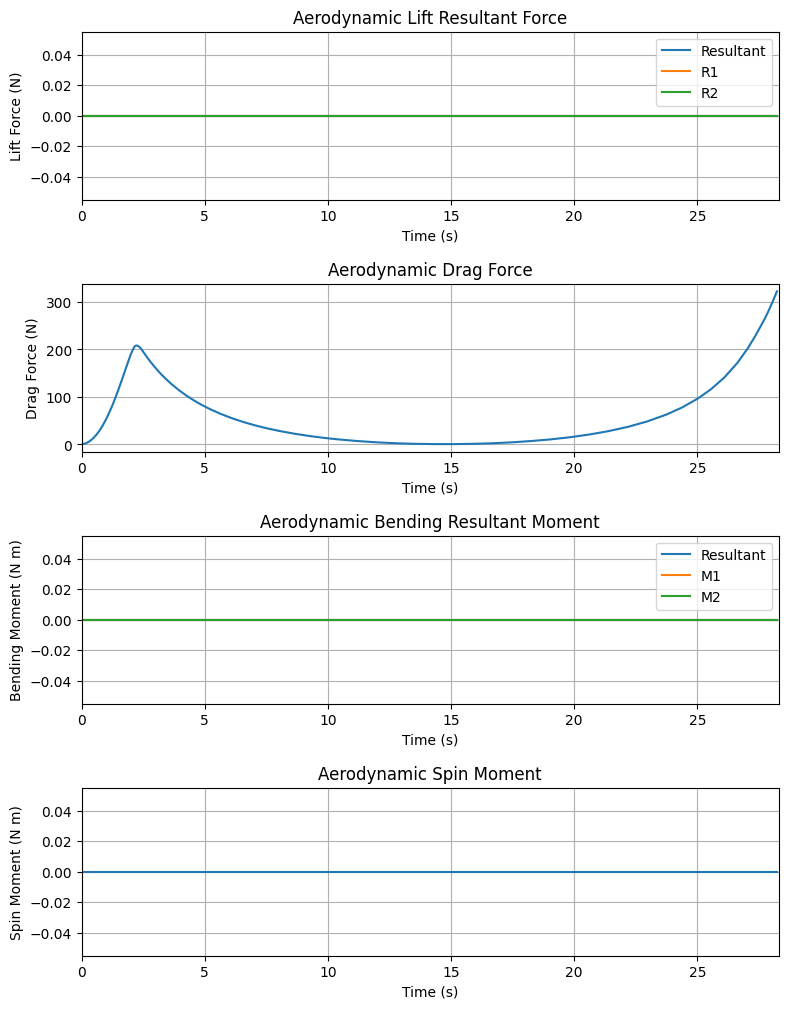



Rail Buttons Forces Plots

No rail buttons were defined. Skipping rail button plots.


Trajectory Energy Plots



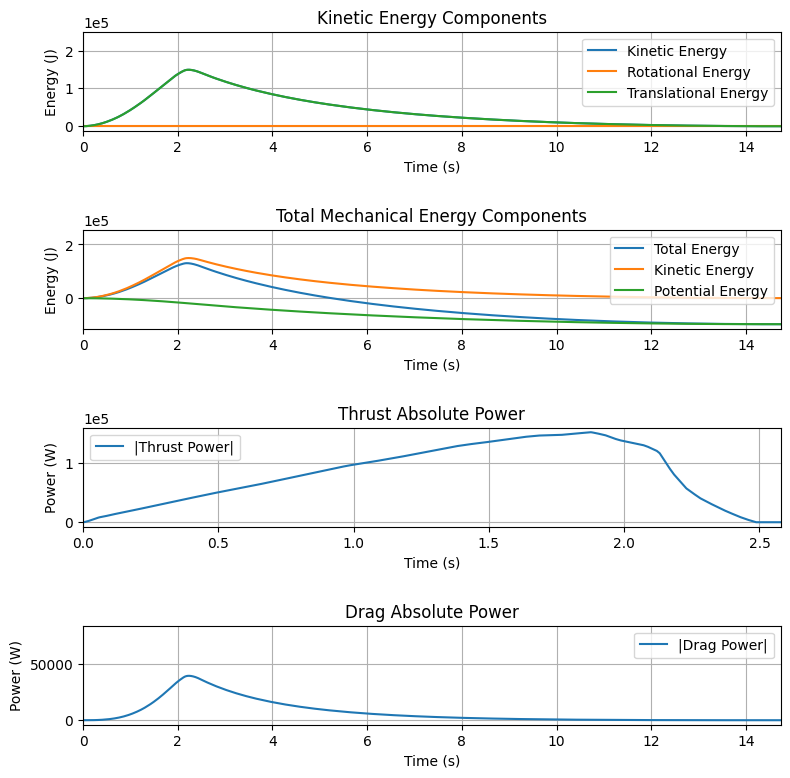



Trajectory Fluid Mechanics Plots



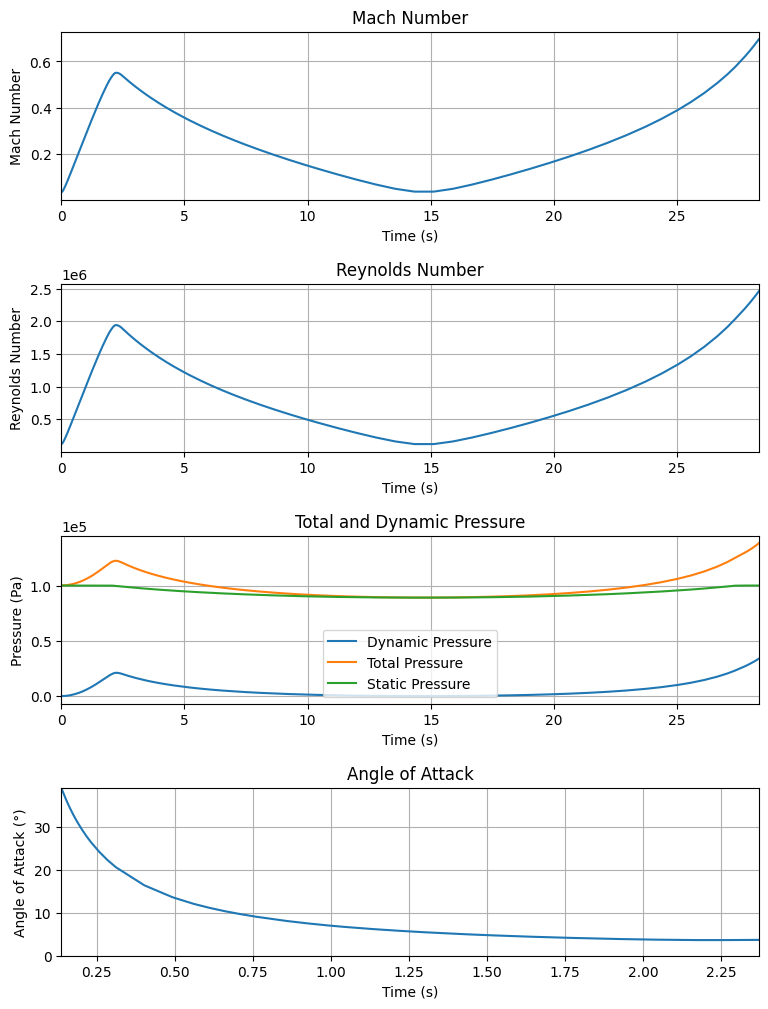



Trajectory Stability and Control Plots



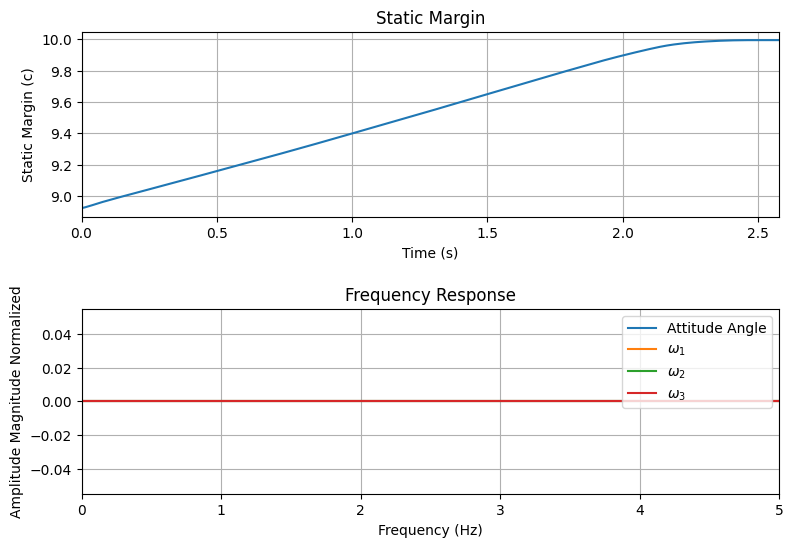



Rocket and Parachute Pressure Plots



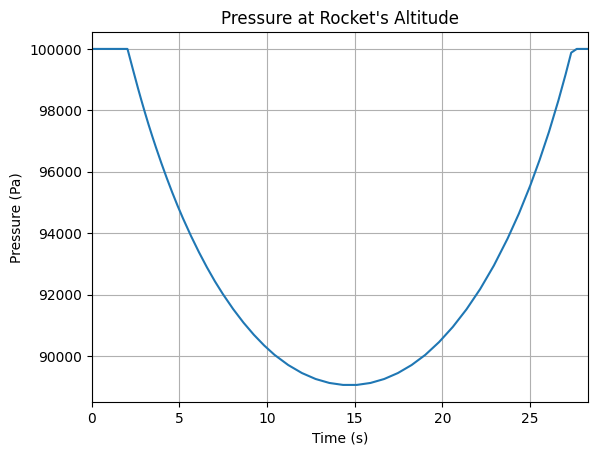


Rocket has no parachutes. No parachute plots available


In [71]:
flight.all_info()